<a href="https://colab.research.google.com/github/Shivanikumari0809/Shivani_BigData/blob/main/Train_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the dataset

In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
uploaded = files.upload()

Saving train_model.py to train_model.py


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving create_dataset.py to create_dataset.py


In [7]:
from google.colab import files
uploaded = files.upload()

Saving Book1.csv to Book1.csv


## Importing Libraries

In [8]:
import numpy as np
import re
import pickle
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Unpickling the dataset

In [9]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Book1.csv', encoding='latin-1')

# Convert the DataFrame to a list or dictionary
data = df.to_dict('records')  # Convert to a list of dictionaries

In [10]:
import pickle

with open('Book1.csv.pkl', 'wb') as f:
    pickle.dump(data, f)
with open('Book1.csv.pkl', 'wb') as f:
    pickle.dump(data, f)

In [11]:
with open('Book1.csv.pkl','rb') as f:
    X = pickle.load(f)

with open('Book1.csv.pkl','rb') as f:
    y = pickle.load(f)

## Creating the Corpus

In [12]:
corpus = []
for i in range(len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

## Creating the BOW Model

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=2000,min_df = 3,max_df = 0.6,stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

## Convert BOW to TF-TDF model

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = transformer.fit_transform(X).toarray()

## Creating the Tf-Idf model directly

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

## Splitting the Data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 0,shuffle=True)

## Training the Models

In [23]:
print(type(Y_train))
print(type(X_train))
print(Y_train[:5])  # Display the first few entries of Y_train
print(X_train[:5])  # Display the first few rows of X_train


<class 'list'>
<class 'numpy.ndarray'>
[{'sentiment': 0, 'text': "life suckz. my mom got this huge sat preparation book and she's going to make me ruin my whole summer by finishing it."}, {'sentiment': 0, 'text': "excessive speed kills- especially in bach's cantatas"}, {'sentiment': 0, 'text': 'info incorrect on amazon web sight!!!!'}, {'sentiment': 0, 'text': 'stuck at home on a friday night..sucks my moms car is getting fixed which causes me not to have my car'}, {'sentiment': 1, 'text': 'i just got rick rolled.'}]
[[0.         0.         0.         0.         0.         0.
  0.49857877 0.         0.         0.         0.         0.47792492
  0.         0.49857877 0.         0.         0.52385703 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.   

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = 'Book1.csv'
dataset = pd.read_csv(file_path)

# Step 1: Transform the 'text' column into numerical features using TF-IDF
vectorizer = TfidfVectorizer()

# Transform the text column into a sparse matrix (numerical format)
X_train = vectorizer.fit_transform(dataset['text'])

# Step 2: Define the target variable ('sentiment' column)
Y_train = dataset['sentiment']

# Step 3: Ensure that the data is in the correct format
print("X_train shape:", X_train.shape)  # This should print (n_samples, n_features)
print("Y_train shape:", Y_train.shape)  # This should print (n_samples,)

# Step 4: Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Step 5: Print model coefficients to check the model output
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


X_train shape: (149, 671)
Y_train shape: (149,)
Model coefficients: [-0.20714902  0.13210311  0.07682104 -0.10263592 -0.10263592 -0.20714902
 -0.07661932 -0.11254574  0.13210311  0.34141559  0.10651134 -0.21960361
  0.23562339 -0.12235873  0.20647055 -0.07661932  0.29312163  0.07682104
 -0.25132094  0.20903981  0.5763116   0.24565587 -0.43041406  0.12605706
 -0.29265197  0.01158961 -0.0583582   0.13388319  0.16479685 -0.1197688
 -0.19329598 -0.28838844 -0.0091738   0.20647055  0.39903766 -0.28045648
 -0.19679891 -0.68891839  0.06537056  0.20728472 -0.21301729 -0.15878353
  0.14189798  0.23442931  0.34087184  0.28365896 -0.35414273 -0.08279373
 -0.29500973 -0.19502573  0.13210311  0.17247356  0.01296657 -0.33202037
 -0.25438665 -0.17555598 -0.01510633 -0.70033378  0.30545229  0.07062101
 -0.19679891  0.34740986  0.16479685 -0.42228218 -0.21960361  0.50121837
  0.20647055  0.2791953  -0.24903762  0.16747687  0.21006094  0.45862923
 -0.25434461  0.28178985 -0.11254574  0.26139341  0.25938

In [67]:
svm = SVC(C=1.0)  # Try adjusting the C parameter
svm.fit(X_train, Y_train)


SVC()

In [68]:
rf = RandomForestClassifier(max_depth=10)  # Try reducing the max_depth to avoid overfitting
rf.fit(X_train, Y_train)


RandomForestClassifier(max_depth=10)

In [69]:
classifier = LogisticRegression(C=1.0)  # Regularization parameter
classifier.fit(X_train, Y_train)


LogisticRegression()

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [55]:
from sklearn.svm import SVC
svm = SVC(C=1000,gamma=0.001)
svm.fit(X_train,Y_train)

SVC(C=1000, gamma=0.001)

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=6,max_iter = 100000)
classifier.fit(X_train,Y_train)

LogisticRegression(C=6, max_iter=100000)

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000)

## Saving the Model

In [58]:
!mkdir models
with open('models/vectorizer.pickle','wb') as f:
    pickle.dump(vectorizer,f)

with open('models/svm.pickle','wb') as f:
    pickle.dump(svm,f)

with open('models/classifier.pickle','wb') as f:
    pickle.dump(classifier,f)



mkdir: cannot create directory ‘models’: File exists


## Testing the Model

In [59]:
from sklearn.metrics import classification_report

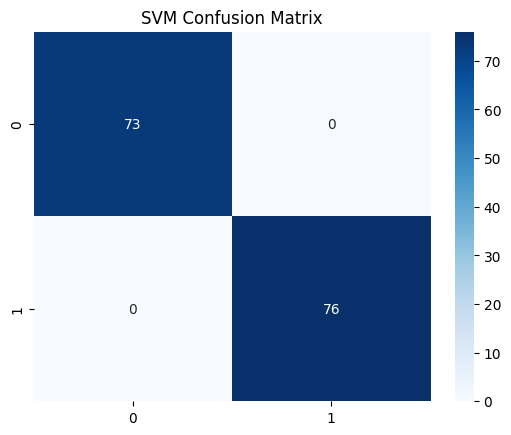

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# For SVM
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(Y_test, y_pred_svm)

# Plot confusion matrix
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title('SVM Confusion Matrix')
plt.show()


------------------------------ SVM --------------------------------

              precision    recall  f1-score   support

           0       0.48      0.77      0.59        13
           1       0.67      0.35      0.46        17

    accuracy                           0.53        30
   macro avg       0.57      0.56      0.52        30
weighted avg       0.58      0.53      0.52        30



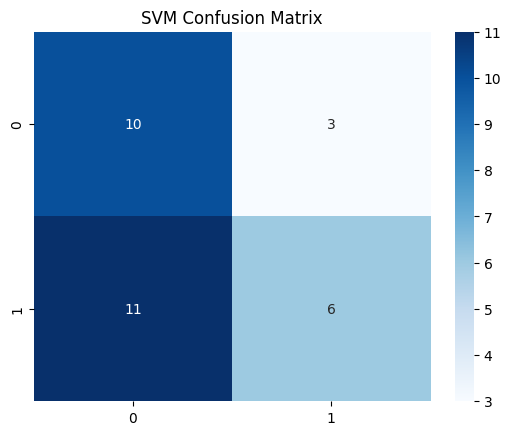

-------------------------------- XX -------------------------------

----------------------- Logistic Regression -----------------------

              precision    recall  f1-score   support

           0       0.42      0.62      0.50        13
           1       0.55      0.35      0.43        17

    accuracy                           0.47        30
   macro avg       0.48      0.48      0.46        30
weighted avg       0.49      0.47      0.46        30



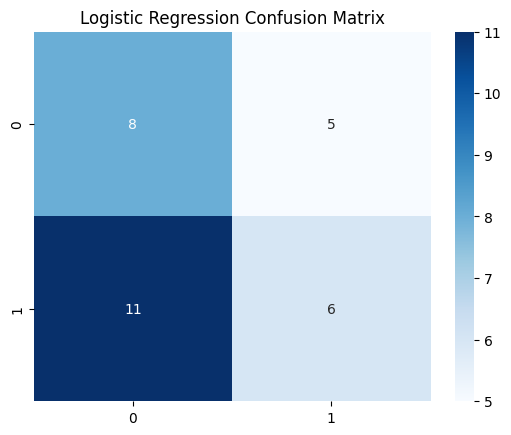

-------------------------------- XX -------------------------------

--------------------------- Random Forest -------------------------

              precision    recall  f1-score   support

           0       0.43      0.23      0.30        13
           1       0.57      0.76      0.65        17

    accuracy                           0.53        30
   macro avg       0.50      0.50      0.47        30
weighted avg       0.51      0.53      0.50        30



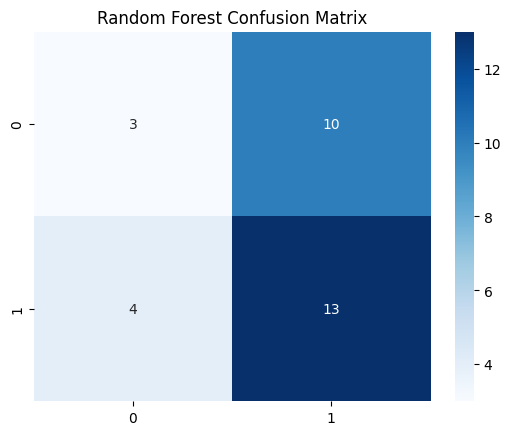

-------------------------------- XX -------------------------------



In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# Step 1: Load your dataset
# Assuming you have already loaded the dataset into `df`
df = pd.read_csv("Book1.csv")  # Replace with your file path

# Step 2: Prepare the features and target
X = df['text']  # Replace 'text' with your actual text column name
Y = df['sentiment']  # Replace 'label' with your actual label column name

# Step 3: Train-Test Split (Ensure proper data split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Apply TF-IDF Vectorization (fit on training, transform on testing)
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 5: Handle Class Imbalance (if needed, using SMOTE)
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train_vect, Y_train)

# Step 6: Initialize the models
svm = SVC(class_weight='balanced')  # Balance classes in SVM
log_reg = LogisticRegression(class_weight='balanced')  # Balance classes in Logistic Regression
rf = RandomForestClassifier(class_weight='balanced', max_depth=10)  # Balance classes in RF and limit max depth

# Step 7: Train the models
svm.fit(X_train_smote, Y_train_smote)
log_reg.fit(X_train_smote, Y_train_smote)
rf.fit(X_train_smote, Y_train_smote)

# Step 8: Evaluate each model using the test set

# SVM Model
y_pred_svm = svm.predict(X_test_vect)
print('------------------------------ SVM --------------------------------\n')
print(classification_report(Y_test, y_pred_svm))
cm_svm = confusion_matrix(Y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title('SVM Confusion Matrix')
plt.show()
print('-------------------------------- XX -------------------------------\n')

# Logistic Regression Model
y_pred_log_reg = log_reg.predict(X_test_vect)
print('----------------------- Logistic Regression -----------------------\n')
print(classification_report(Y_test, y_pred_log_reg))
cm_log_reg = confusion_matrix(Y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues")
plt.title('Logistic Regression Confusion Matrix')
plt.show()
print('-------------------------------- XX -------------------------------\n')

# Random Forest Model
y_pred_rf = rf.predict(X_test_vect)
print('--------------------------- Random Forest -------------------------\n')
print(classification_report(Y_test, y_pred_rf))
cm_rf = confusion_matrix(Y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Random Forest Confusion Matrix')
plt.show()
print('-------------------------------- XX -------------------------------\n')


In [70]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Assuming you have X_train, Y_train, X_test, Y_test available
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Step 1: Transform the 'text' column into numerical features using TF-IDF
X_train = vectorizer.fit_transform(dataset['text'])  # Apply TF-IDF to training data

# Ensure you apply the same transformation to X_test
X_test = vectorizer.transform(dataset['text'])  # Apply the same transformation to test data

# Step 2: Define the target variable ('sentiment' column)
Y_train = dataset['sentiment']
Y_test = dataset['sentiment']  # Assuming 'sentiment' for Y_test as well

# Step 3: Train the models
# SVM
svm = SVC()  # Define the SVM model
svm.fit(X_train, Y_train)  # Train the SVM model

# Logistic Regression
classifier = LogisticRegression()  # Define the logistic regression model
classifier.fit(X_train, Y_train)  # Train the logistic regression model

# Random Forest
rf = RandomForestClassifier()  # Define the random forest model
rf.fit(X_train, Y_train)  # Train the random forest model

# Step 4: Evaluate each model
# SVM
y_pred = svm.predict(X_test)
print('------------------------------ SVM --------------------------------\n')
print(classification_report(Y_test, y_pred))
print('-------------------------------- XX -------------------------------\n')

# Logistic Regression
y_pred = classifier.predict(X_test)
print('----------------------- Logistic Regression -----------------------\n')
print(classification_report(Y_test, y_pred))
print('-------------------------------- XX -------------------------------\n')

# Random Forest
y_pred = rf.predict(X_test)
print('--------------------------- Random Forest -------------------------\n')
print(classification_report(Y_test, y_pred))
print('-------------------------------- XX -------------------------------\n')


------------------------------ SVM --------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        76

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149

-------------------------------- XX -------------------------------

----------------------- Logistic Regression -----------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        76

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149

-------------------------------- XX -------------------------------

--------------------------- Random Forest -------------------------

 